In [1]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler   
from sklearn.linear_model import LogisticRegression  
from sklearn import datasets, linear_model, metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


df= pd.read_csv("retailsfinal.csv")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57290 entries, 0 to 57289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         57290 non-null  int64 
 1   Unnamed: 0.2       57290 non-null  int64 
 2   Unnamed: 0.1       57290 non-null  int64 
 3   Unnamed: 0.1.1     57290 non-null  int64 
 4   N°CANEVAS          57290 non-null  object
 5   Date_Création      57290 non-null  object
 6   Code_Produit       57290 non-null  int64 
 7   Montant_Sollicité  57290 non-null  int64 
 8   Revenu_Annuel      57290 non-null  int64 
 9   Retenu_Mensuel     57290 non-null  int64 
 10  Date_Naissance     57290 non-null  object
 11  Décision_Finale    57290 non-null  int64 
 12  Centre_Décision    57290 non-null  object
 13  secteur_EMPLOYE    57290 non-null  int64 
 14  secteur_INCONNU    57290 non-null  int64 
 15  secteur_LIBERAL    57290 non-null  int64 
 16  secteur_RETRAITES  57290 non-null  int64

In [3]:
features= ['Montant_Sollicité','Revenu_Annuel','Retenu_Mensuel',
           'secteur_EMPLOYE','secteur_INCONNU','secteur_LIBERAL','secteur_RETRAITES',
           'typecanevas_AUTO','typecanevas_CONSO','typecanevas_IMMO','sexe_F','sexe_M','age']
x = df.loc[:, features].values
x

array([[25000000, 17340000,   450392, ...,        0,        1,       64],
       [30000000, 21699924,        0, ...,        0,        1,       46],
       [ 3000000, 10895184,        0, ...,        0,        1,       30],
       ...,
       [64000000, 31332000,        0, ...,        0,        1,       49],
       [28000000, 18068160,    68400, ...,        0,        1,       28],
       [ 3000000, 15176496,   442582, ...,        0,        1,       40]],
      dtype=int64)

In [4]:
y= df.iloc[:, 9].values
y=df['Décision_Finale']
y

0        0
1        0
2        0
3        0
4        0
        ..
57285    0
57286    0
57287    0
57288    0
57289    0
Name: Décision_Finale, Length: 57290, dtype: int64

In [5]:
df['Décision_Finale'].unique()

array([0, 1], dtype=int64)

In [6]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [7]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [8]:
#Fitting Logistic Regression to the training set  

classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  


LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [10]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [11]:
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)
geometric_mean_score(y_test, y_pred,average="binary", correction=0.001)


Logistic Regression model accuracy(in %): 93.4161837603854


NameError: name 'geometric_mean_score' is not defined

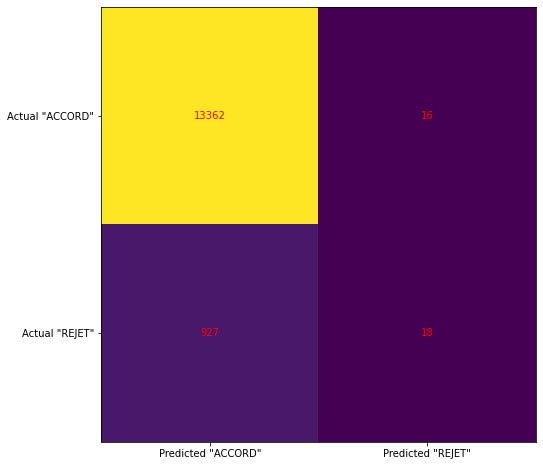

In [14]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted "ACCORD"', 'Predicted "REJET"'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual "ACCORD"', 'Actual "REJET"'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13378
           1       0.53      0.02      0.04       945

    accuracy                           0.93     14323
   macro avg       0.73      0.51      0.50     14323
weighted avg       0.91      0.93      0.90     14323



In [16]:
#logistic regression for imbalanced dataset

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


In [18]:
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }



In [19]:
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(x_train,y_train)


print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.6720103888307227 with param: {'class_weight': {0: 0.001, 1: 1.0}}


In [20]:
#param optimal : w = {0: 0.001, 1: 1.0} 
grid.best_score_

0.6720103888307227